In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv(r'../data/titanic.csv')
print(df.head())
print(df.info())

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age     fare  sibsp  parch  
0    male  22.0   7.2500      1      0  
1  female  38.0  71.2833      1      0  
2  female  26.0   7.9250      0      0  
3  female  35.0  53.1000      1      0  
4    male  35.0   8.0500      0      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex  

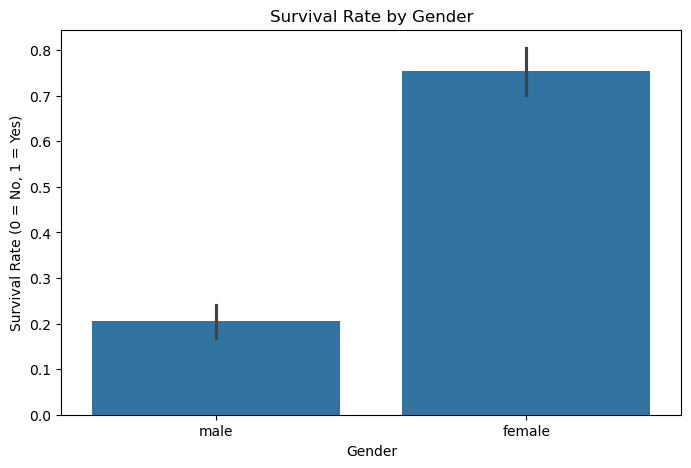

In [23]:
# Handle missing values (avoid in-place warning)
df['age'] = df['age'].fillna(df['age'].median())

# Create visualizations
# 1. Bar plot for survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (0 = No, 1 = Yes)')
plt.show()

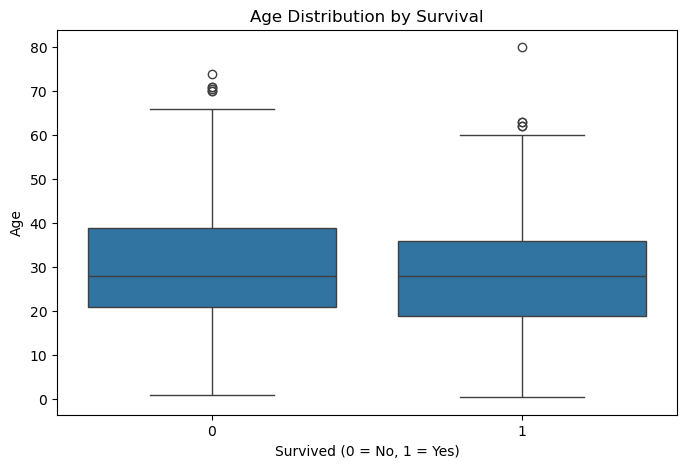

In [31]:
# 2. Box plot for age distribution by survival
plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

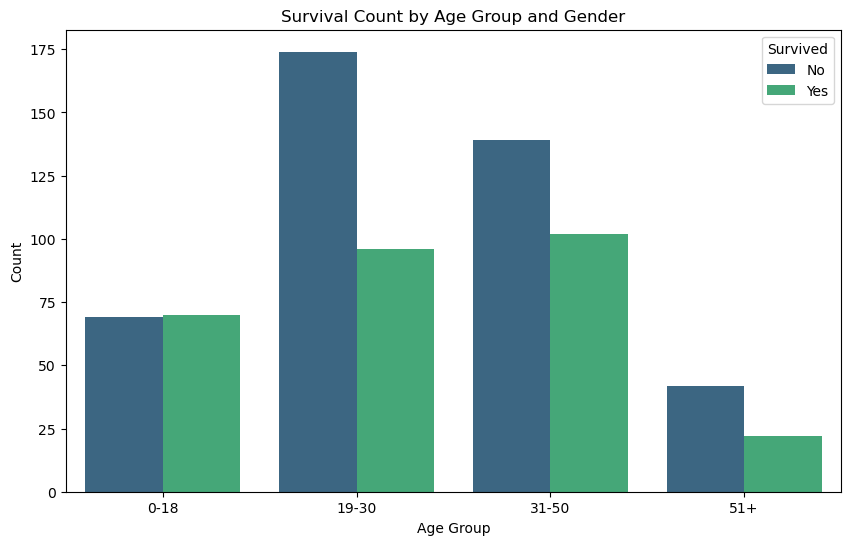

In [27]:
# 3. Count plot for survival by gender and age group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=df, palette='viridis')
plt.title('Survival Count by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

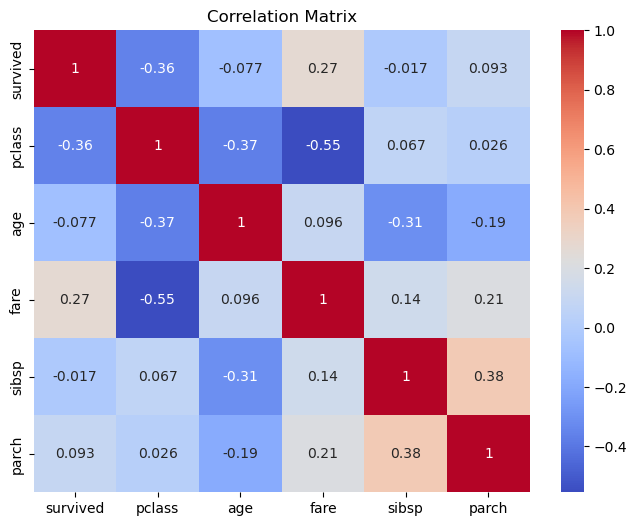

In [35]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute and plot the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
